In [21]:
cd /home/edrewke/FHDeX/exec/immersed_boundary/flagellum/

/home/edrewke/FHDeX/exec/immersed_boundary/flagellum


In [1]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
class SoA:
    _pref = "particle_"
    _pos  = "position_"
    _vel  = "vel"
    # New here
    _id   = "id"
    _cpu  = "cpu"
    _id_0 = "id_0"
    _cpu_0 = "cpu_0"
    
    def __init__(self, data):
        str_pos = self._pref+self._pos
        self.px = np.array(data[str_pos + "x"])
        self.py = np.array(data[str_pos + "y"])
        self.pz = np.array(data[str_pos + "z"])

        str_vel = self._pref+self._vel
        self.vx = np.array(data[str_vel + "x"])
        self.vy = np.array(data[str_vel + "y"])
        self.vz = np.array(data[str_vel + "z"])

        str_id = self._pref+self._id
        self.id = np.array(data[str_id])
        str_cpu = self._pref+self._cpu
        self.cpu = np.array(data[str_cpu])
        
        str_id_0 = self._pref+self._id_0
        self.id_0 = np.array(data[str_id_0])
        str_cpu_0 = self._pref+self._cpu_0
        self.cpu_0 = np.array(data[str_cpu_0])
 
    # new here
    def __str__(self):
        return "{pos:"  + str(self.px) + "," + str(self.py) + "," + str(self.pz) + \
              "; vel:"  + str(self.vx) + "," + str(self.vy) + "," + str(self.vz) + \
              "; id:"   + str(self.id) + ", cpu:" + str(self.cpu) + ", id_0:" + str(self.id_0) + ", cpu_0:" + str(self.cpu_0) + "," + "}"


    def __repr__(self):
        return str(self)


# new here
class Particle:
    def __init__(self, px, py, pz, vx, vy, vz, id, cpu, id_0, cpu_0):
        self.pos = np.array([px, py, pz])
        self.vel = np.array([vx, vy, vz])
        self.id  = np.array(id)
        self.cpu  = np.array(cpu)
        self.id_0  = np.array(id_0)
        self.cpu_0  = np.array(cpu_0)

    def __str__(self):
        return "P(" + str(self.pos) + "," + str(self.vel) + "," + str(self.id) + "," + str(self.cpu) + "," + str(self.id_0) + "," + str(self.cpu_0) + "," + ")"
    

    def __repr__(self):
        return str(self)


class AoS:
    def __init__(self, amrex_data):
        self.particles = list()
        soa = SoA(amrex_data)
        # new here        
        data = zip(soa.px, soa.py, soa.pz, soa.vx, soa.vy, soa.vz, soa.id, soa.cpu, soa.id_0, soa.cpu_0)
        for elt in data:
            self.particles.append(Particle(* elt))




In [4]:
data_root = "."
data_dir  = "."

In [5]:
data_path = os.path.join(data_root, data_dir)

In [6]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [96]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()
#print(data_files)

yt : [INFO     ] 2019-07-23 18:15:37,542 Parameters: current_time              = 0.05200000000000525
yt : [INFO     ] 2019-07-23 18:15:37,543 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:37,544 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-23 18:15:37,544 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-23 18:15:37,573 Parameters: current_time              = 0.05200000000000525
yt : [INFO     ] 2019-07-23 18:15:37,574 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:37,574 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-23 18:15:37,576 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-23 18:15:38,154 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:38,155 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:38,156 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:38,157 ylim = 


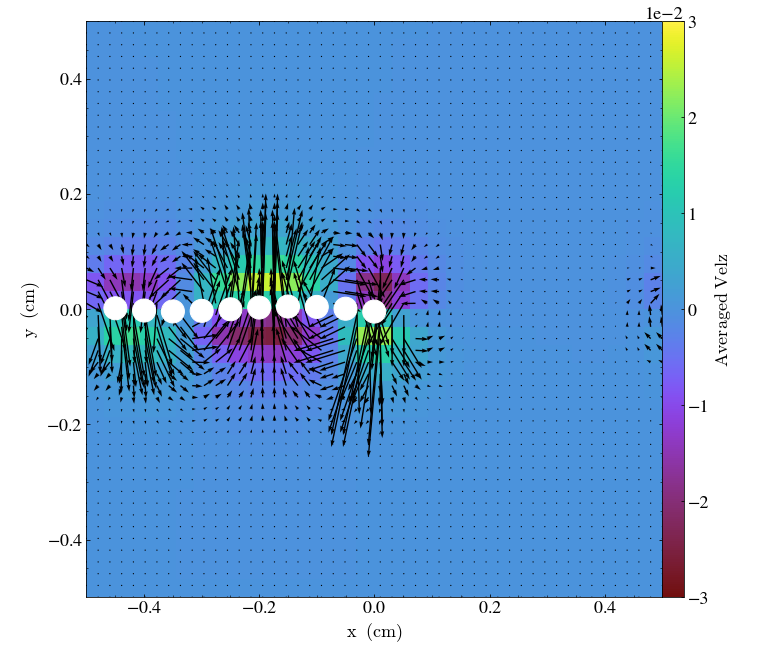

In [97]:
ds = yt.load(data_files[-1])

amrex_ds = AMReXDataset(data_files[-1])
ad = amrex_ds.all_data()
aos = AoS(ad)

slc = yt.SlicePlot(ds, "z", "averaged_velz")

slc.set_log("averaged_velx", False)
slc.set_log("averaged_vely", False)
slc.set_log("averaged_velz", False)
slc.set_zlim('averaged_velz', -0.03, .03)

slc.annotate_quiver("averaged_velx", "averaged_vely")

for j, part in enumerate(aos.particles):
    p = part.pos
    p.tolist()
    slc.annotate_sphere(p, radius=(.02), circle_args={'fill':True, 'color':'white'})
    #slc.annotate_marker(p,plot_args={'color':'black'})

slc.show()

In [98]:
len(data_files)

53

In [99]:
for i, data_file in enumerate(data_files):
    frame_file = "frame_" + str(i).zfill(5) + ".png"

    if os.path.isfile(frame_file):
        continue
    else:
        print(f"Working on: {frame_file}")

    ds = yt.load(data_file)
    
    amrex_ds = AMReXDataset(data_file)
    ad = amrex_ds.all_data()
    aos = AoS(ad)
    
    
        
    slc = yt.SlicePlot(ds, "z", "averaged_velz")
    
    slc.set_log("averaged_velx", False)
    slc.set_log("averaged_vely", False)
    slc.set_log("averaged_velz", False)
    slc.set_zlim('averaged_velz', -0.03, .03)
    
    slc.annotate_quiver("averaged_velx", "averaged_vely")
    
    for j, part in enumerate(aos.particles):
        p = part.pos
        p.tolist()
        slc.annotate_sphere(p, radius=(.02), circle_args={'fill':True, 'color':'white'})
        #slc.annotate_marker(p,plot_args={'color':'black'})
    
    slc.save(frame_file)

yt : [INFO     ] 2019-07-23 18:15:42,886 Parameters: current_time              = 0.048000000000004026
yt : [INFO     ] 2019-07-23 18:15:42,887 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:42,888 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-23 18:15:42,888 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-23 18:15:42,918 Parameters: current_time              = 0.048000000000004026
yt : [INFO     ] 2019-07-23 18:15:42,918 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:42,919 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-23 18:15:42,920 Parameters: domain_right_edge         = [1. 1. 1.]


Working on: frame_00048.png


yt : [INFO     ] 2019-07-23 18:15:43,413 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:43,413 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:43,415 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:43,415 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:43,416 Making a fixed resolution buffer of (('boxlib', 'averaged_velz')) 800 by 800
yt : [WARNING  ] 2019-07-23 18:15:43,457 Plot image for field ('boxlib', 'averaged_velz') has both positive and negative values. Min = -0.019982, Max = 0.020402.
yt : [WARNING  ] 2019-07-23 18:15:43,458 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-23 18:15:43,736 Saving plot frame_00048.png
yt : [INFO     ] 2019-07-23 18:15:44,192 Parameters: current_time              = 0.04900000000000433
yt : [INFO     ] 2019-07-23 18:15:44,217 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:44,221 Parameters: domain_left_edge      

Working on: frame_00049.png


yt : [INFO     ] 2019-07-23 18:15:44,696 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:44,699 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:44,701 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:44,703 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:44,706 Making a fixed resolution buffer of (('boxlib', 'averaged_velz')) 800 by 800
yt : [WARNING  ] 2019-07-23 18:15:44,733 Plot image for field ('boxlib', 'averaged_velz') has both positive and negative values. Min = -0.015715, Max = 0.015998.
yt : [WARNING  ] 2019-07-23 18:15:44,736 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-23 18:15:45,044 Saving plot frame_00049.png
yt : [INFO     ] 2019-07-23 18:15:45,402 Parameters: current_time              = 0.05000000000000464
yt : [INFO     ] 2019-07-23 18:15:45,404 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:45,410 Parameters: domain_left_edge      

Working on: frame_00050.png


yt : [INFO     ] 2019-07-23 18:15:45,935 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:45,937 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:45,940 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:45,942 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:45,944 Making a fixed resolution buffer of (('boxlib', 'averaged_velz')) 800 by 800
yt : [WARNING  ] 2019-07-23 18:15:45,971 Plot image for field ('boxlib', 'averaged_velz') has both positive and negative values. Min = -0.017874, Max = 0.018300.
yt : [WARNING  ] 2019-07-23 18:15:45,973 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-23 18:15:46,270 Saving plot frame_00050.png
yt : [INFO     ] 2019-07-23 18:15:46,659 Parameters: current_time              = 0.051000000000004944
yt : [INFO     ] 2019-07-23 18:15:46,664 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:46,666 Parameters: domain_left_edge     

Working on: frame_00051.png


yt : [INFO     ] 2019-07-23 18:15:47,153 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:47,161 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:47,163 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:47,165 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:47,167 Making a fixed resolution buffer of (('boxlib', 'averaged_velz')) 800 by 800
yt : [WARNING  ] 2019-07-23 18:15:47,196 Plot image for field ('boxlib', 'averaged_velz') has both positive and negative values. Min = -0.025864, Max = 0.026702.
yt : [WARNING  ] 2019-07-23 18:15:47,202 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-23 18:15:47,611 Saving plot frame_00051.png
yt : [INFO     ] 2019-07-23 18:15:48,039 Parameters: current_time              = 0.05200000000000525
yt : [INFO     ] 2019-07-23 18:15:48,040 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-23 18:15:48,041 Parameters: domain_left_edge      

Working on: frame_00052.png


yt : [INFO     ] 2019-07-23 18:15:48,568 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:48,576 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:48,578 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:48,580 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-23 18:15:48,583 Making a fixed resolution buffer of (('boxlib', 'averaged_velz')) 800 by 800
yt : [WARNING  ] 2019-07-23 18:15:48,609 Plot image for field ('boxlib', 'averaged_velz') has both positive and negative values. Min = -0.025191, Max = 0.026082.
yt : [WARNING  ] 2019-07-23 18:15:48,611 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-23 18:15:48,969 Saving plot frame_00052.png


In [30]:
ds.field_list

[('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'divergence'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer')]

In [31]:
ds.particle_field_by_type


AttributeError: 'BoxlibDataset' object has no attribute 'particle_field_by_type'

In [ ]:
ad = ds.all_data()
aos = AoS(ad)

In [ ]:
for i, part in enumerate(aos.particles):
    print(part.pos)

In [ ]:
p = aos.particles[1]


In [ ]:
p.annotate_sphere([0.5, 0.5, 0.5], radius=(2, 'kpc'),
                  circle_args={'color':'black'})

In [ ]:
p
